The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,315 transactions. It has 30 input features and 1 target variable. 
## The dataset is highly unbalanced, the positive class (frauds) account for 0.173% of all transactions.

The data set is publicly available at https://www.kaggle.com/mlg-ulb/creditcardfraud/home

In [11]:
# import the external libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


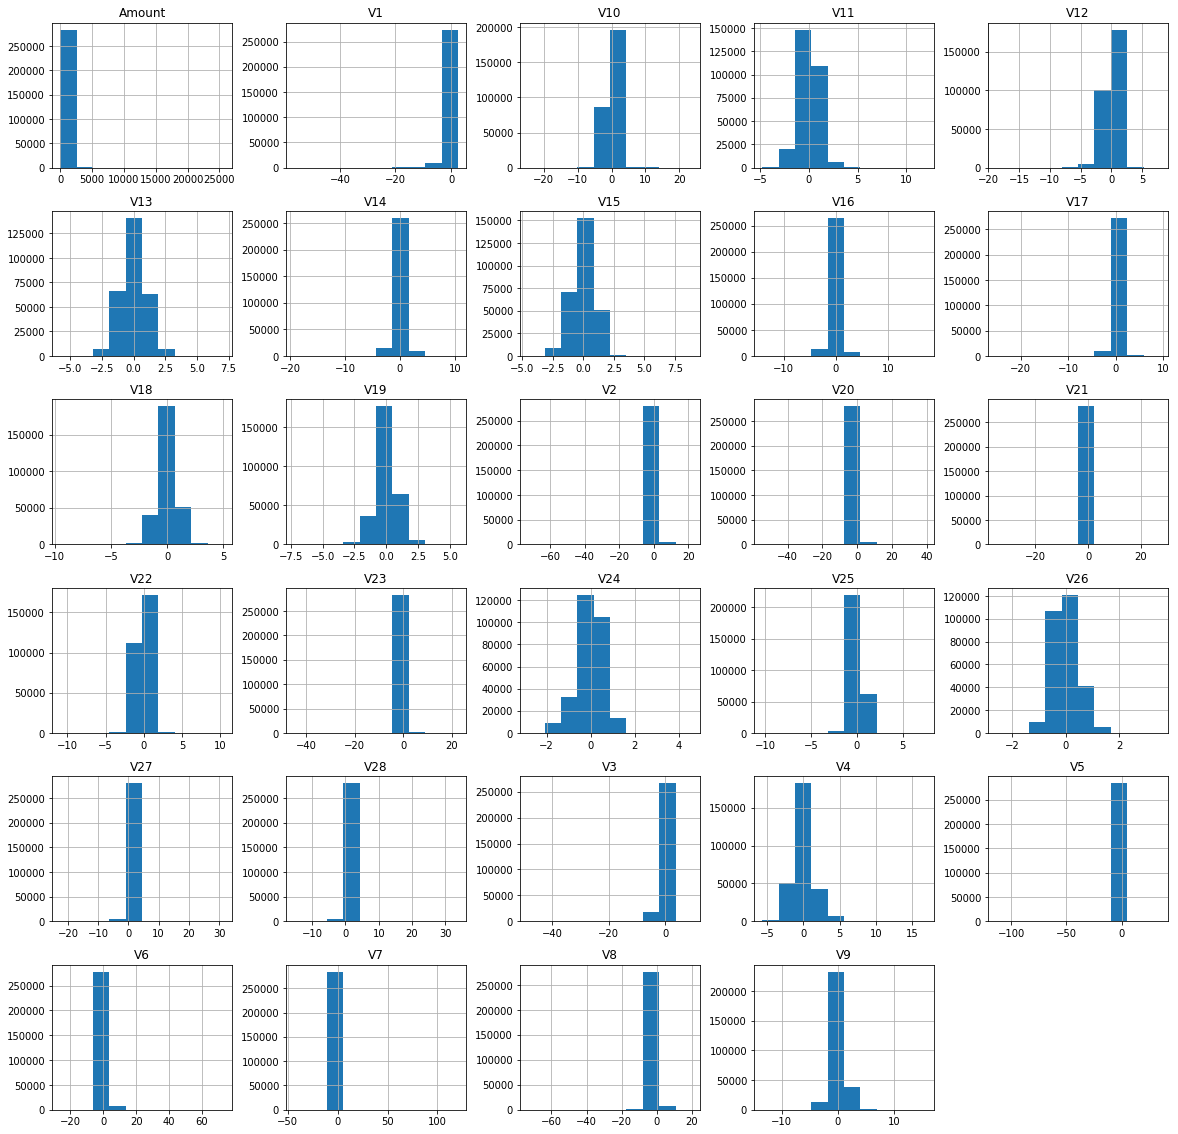

In [14]:
# Only use the 'Amount' and 'V1', ..., 'V28' features
features = ['V%d' % number for number in range(1, 29)] + ['Amount']
#In above, I used '4' to limit the subplots but actually we have to use '29'.

# The target variable which we would like to predict, is the 'Class' variable
target = 'Class'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = data[features]
y = data[target]

# Plot histograms of each parameter 
X.hist(figsize = (20, 20))
plt.show()


In above, you can notice that all the variable are not at the same scale and distribution. Some of the variables have a wide range of values (like the Amount variable). Machine learning algorithms can’t estimate correct output without the standard normally distributed data. We will use StandardScaler function from scikit-learn to standardize our data.

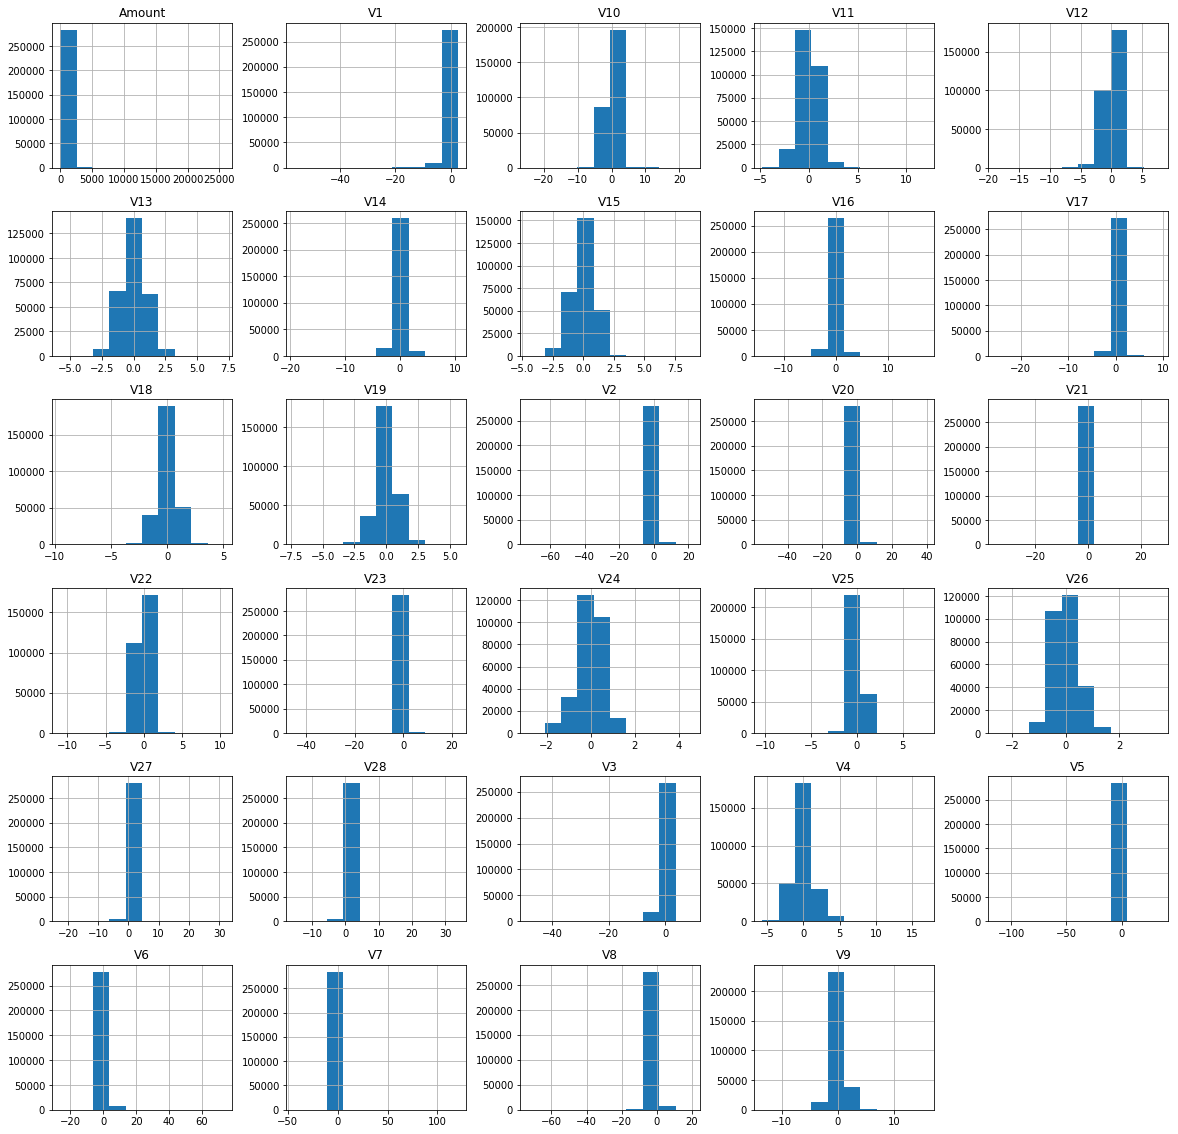

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)

# Plot histograms of each parameter 
X.hist(figsize = (20, 20))
plt.show()


First, we will split our dataset into train and test set using ‘train_test_split’ function. After that we will train our model and then we will predict using our trained model.

In [6]:
#Split the data set using 'train_test_split' function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [7]:
# Instantiate the model to an empty object
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [8]:
# Train the model using 'fit' method
model.fit(X_train, y_train)

C:\Users\Api\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# Test the model using 'predict' method
y_pred = model.predict(X_test)

In [10]:
# Print the classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.58      0.18      0.28       103

    accuracy                           1.00     56962
   macro avg       0.79      0.59      0.64     56962
weighted avg       1.00      1.00      1.00     56962



Congratulations! The 0 class (transactions without fraud) is predicted with 100% precision and recall whereas the 1 class (transactions which are fraudulent) has more than 60% precision. This means that 40% of the transactions which are fraudulent remain undetected by the system. This can be further improved by providing more training data.